## Importar Librerías

In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

## Cargar audios

In [2]:
# Load file on the audio player
ipd.Audio('v1 -  b up.wav')

In [ ]:
ipd.Audio('../Data/pruebas_1/')

In [3]:
# Load file with librosa
def cargar(archivo,inicio):
    audio, ar = librosa.load(archivo, offset=inicio, duration=5)
    return audio, ar

In [4]:
inicios = [2,7,12,17,22,27]

In [5]:
fan_audios = ['v1 - fan.wav', 'v2 - fan.wav', 'v3 - fan.wav', 'v4 - fan.wav', 'v5 - fan.wav', 'v6 - fan.wav', 'v7 - fan.wav',
             'v8 - fan.wav', 'v9 - fan.wav']

In [6]:
a_up_audios = ['v1 - a up.wav', 'v2 - a up.wav', 'v3 - a up.wav', 'v4 - a up.wav', 'v5 - a up.wav', 'v6 - a up.wav', 'v7 - a up.wav',
             'v8 - a up.wav', 'v9 - a up.wav']

In [7]:
a_down_audios = ['v1 - a down.wav', 'v2 - a down.wav', 'v3 - a down.wav', 'v4 - a down.wav', 'v5 - a down.wav', 'v6 - a down.wav', 'v7 - a down.wav',
        'v8 - a down.wav', 'v9 - a down.wav']

In [8]:
b_up_audios = ['v1 -  b up.wav', 'v2 - b up.wav', 'v3 - b up.wav', 'v4 - b up.wav', 'v5 - b up.wav', 'v6 - b up.wav', 'v7 - b up.wav',
    'v8 - b up.wav', 'v9 - b up.wav']

In [9]:
b_down_audios = ['v1 - b down.wav', 'v2 - b down.wav', 'v3 - b down.wav', 'v4 - b down.wav', 'v5 - b down.wav', 'v6 - b down.wav', 'v7 - b down.wav',
        'v8 - b down.wav', 'v9 - b down.wav']

In [10]:
fan = []
fan_sr =[]

In [11]:
a_up = []
a_up_sr = []
a_down = []
a_down_sr =[]
b_up =[]
b_up_sr =[]
b_down =[]
b_down_sr=[]

In [12]:
# Cargamos todos los audios de ventilador
for i in fan_audios:
    for j in inicios:
        audio, ar = cargar(i,j)
        fan.append(audio)
        fan_sr.append(ar)

In [13]:
# Cargamos todos los audios de cada caso
for i in a_up_audios:
    for j in inicios:
        audio, ar = cargar(i,j)
        a_up.append(audio)
        a_up_sr.append(ar)

In [14]:
for i in a_down_audios:
    for j in inicios:
        audio, ar = cargar(i,j)
        a_down.append(audio)
        a_down_sr.append(ar)

In [15]:
for i in b_up_audios:
    for j in inicios:
        audio, ar = cargar(i,j)
        b_up.append(audio)
        b_up_sr.append(ar)

In [16]:
for i in b_down_audios:
    for j in inicios:
        audio, ar = cargar(i,j)
        b_down.append(audio)
        b_down_sr.append(ar)

## Resta del ruido

In [17]:
a_up_final = []
a_down_final = []
b_up_final = []
b_down_final = []

In [18]:
def resta(posición, ventilador, total):
    resta = total[posición]-ventilador[posición]
    return resta

In [19]:
len(a_up[8])

110250

In [20]:
len(fan[12])

110250

In [21]:
len(a_up_final)

0

In [22]:
for i in range(54):
    a_up_final.append(resta(i,fan,a_up))
    a_down_final.append(resta(i,fan,a_down))
    b_up_final.append(resta(i,fan,b_up))
    b_down_final.append(resta(i,fan,b_down))

## Vista gráfica

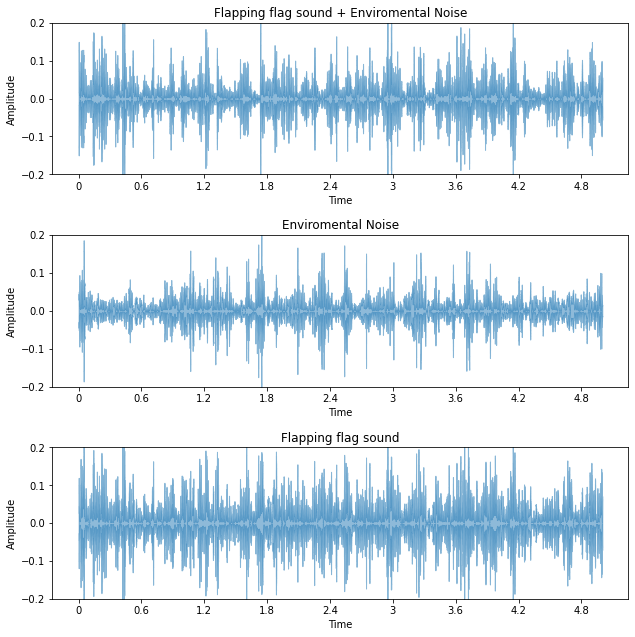

In [23]:
plt.figure(figsize=(10, 10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(3, 1, 1)
librosa.display.waveshow(b_up[40], alpha=0.5)
plt.ylabel('Amplitude')
plt.ylim((-0.2, 0.2))
plt.title("Flapping flag sound + Enviromental Noise")

plt.subplot(3, 1, 2)
librosa.display.waveshow(fan[40], alpha=0.5)
plt.ylim((-0.2, 0.2))
plt.ylabel('Amplitude')
plt.title('Enviromental Noise')

plt.subplot(3, 1, 3)
librosa.display.waveshow(b_up_final[40], alpha=0.5)
plt.ylim((-0.2, 0.2))
plt.ylabel('Amplitude')
plt.title('Flapping flag sound')

plt.show()

## Transformada de Fourier

In [24]:
def transformada(lista,posicion):
    ft = sp.fft.fft(lista[posicion])
    magnitude = np.absolute(ft)
    frequency = np.linspace(0,22050,len(magnitude))
    return ft, magnitude, frequency

In [25]:
a_up_frequency = []
a_up_magnitude = []
a_down_frequency = []
a_down_magnitude = []
b_up_frequency = []
b_up_magnitude = []
b_down_frequency = []
b_down_magnitude = []

In [26]:
listas = ['a_up_final','a_down_final', 'b_up_frequency', 'b_down_frequency']

In [27]:
# Para a_up
for i in range(54):
    lista_tf, lista_magnitude, lista_frequency = transformada(a_up_final,i)
    a_up_frequency.append(lista_frequency)
    a_up_magnitude.append(lista_magnitude)

In [28]:
# Para a_down
for i in range(54):
    lista_tf, lista_magnitude, lista_frequency = transformada(a_down_final,i)
    a_down_frequency.append(lista_frequency)
    a_down_magnitude.append(lista_magnitude)

In [29]:
# Para b_up
for i in range(54):
    lista_tf, lista_magnitude, lista_frequency = transformada(b_up_final,i)
    b_up_frequency.append(lista_frequency)
    b_up_magnitude.append(lista_magnitude)

In [30]:
# Para b_down
for i in range(54):
    lista_tf, lista_magnitude, lista_frequency = transformada(b_down_final,i)
    b_down_frequency.append(lista_frequency)
    b_down_magnitude.append(lista_magnitude)

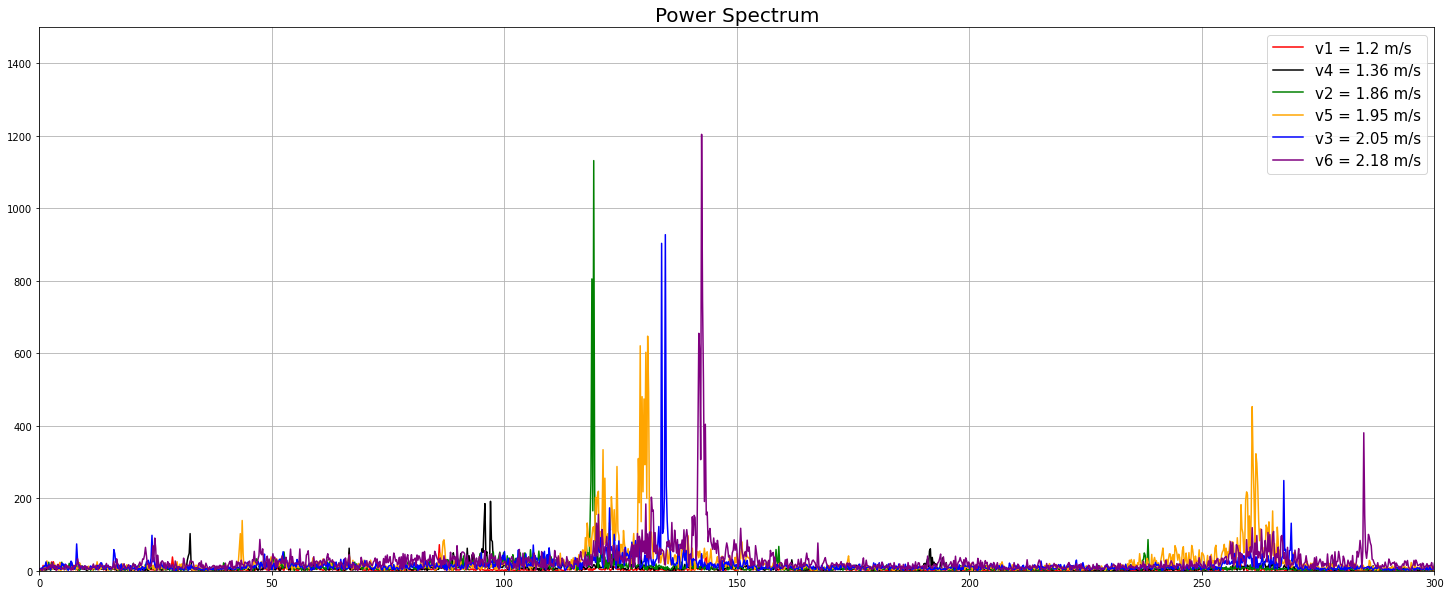

In [31]:
plt.figure(figsize=(25,10))
plt.plot(b_up_frequency[5][:5000], b_up_magnitude[5][:5000], color='r', label='v1 = 1.2 m/s') # magnitude spectrum
plt.plot(b_up_frequency[23][:5000], b_up_magnitude[23][:5000], color='black', label='v4 = 1.36 m/s') # magnitude spectrum
#plt.plot(b_up_frequency[40][:5000], b_up_magnitude[40][:5000], color='cyan', label='v7 = 1.82 m/s') # magnitude spectrum
plt.plot(b_up_frequency[11][:5000], b_up_magnitude[11][:5000], color='g', label='v2 = 1.86 m/s') # magnitude spectrum
plt.plot(b_up_frequency[28][:5000], b_up_magnitude[28][:5000], color='orange', label='v5 = 1.95 m/s') # magnitude spectrum
plt.plot(b_up_frequency[15][:5000], b_up_magnitude[15][:5000], color='b', label='v3 = 2.05 m/s') # magnitude spectrum
plt.plot(b_up_frequency[35][:5000], b_up_magnitude[35][:5000], color='purple', label='v6 = 2.18 m/s') # magnitude spectrum
#plt.plot(b_up_frequency[47][:5000], b_up_magnitude[47][:5000], color='lightBlue', label='v8 = 1.82 m/s') # magnitude spectrum
#plt.plot(b_up_frequency[50][:5000], b_up_magnitude[50][:5000], color='lightGreen', label='v8 = 1.82 m/s') # magnitude spectrum
plt.ylim(0,1500)
plt.xlim(0,300)
plt.legend(fontsize=15)
plt.title('Power Spectrum', fontsize=20)
plt.grid()
plt.show()

Como el mejor montaje se da para b_up vamos a crear una función que grafique esta configuración en Hz.
Valores: 0-5,
        6-10,
        11-16,
        16-20,
        21-25,
        26-30,
        31-35.

In [32]:
a = 5 #3,4,5

## b_up

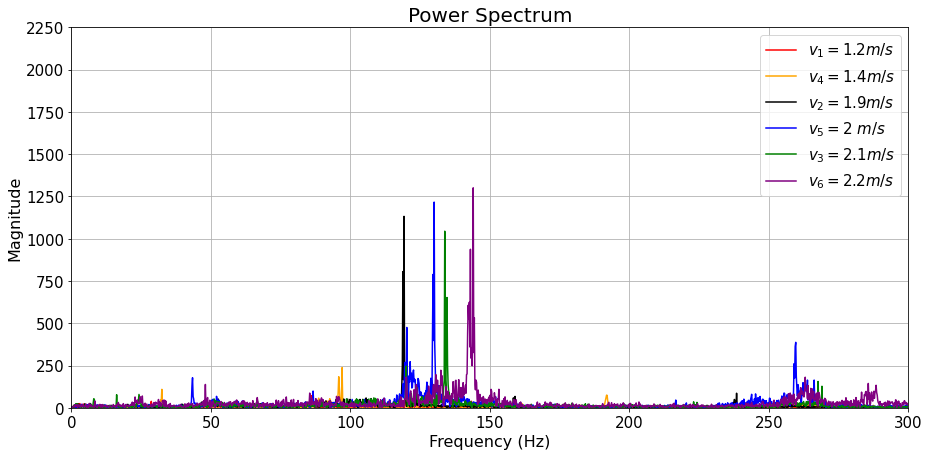

In [33]:
plt.figure(figsize=(15,7))
plt.plot(b_up_frequency[a][:5000], b_up_magnitude[a][:5000], color='r', label='$v_1 = 1.2 m/s$') # magnitude spectrum
plt.plot(b_up_frequency[a+16][:5000], b_up_magnitude[a+16][:5000], color='orange', label='$v_4 = 1.4 m/s$') # magnitude spectrum
plt.plot(b_up_frequency[a+6][:5000], b_up_magnitude[a+6][:5000], color='black', label='$v_2 = 1.9 m/s$') # magnitude spectrum
plt.plot(b_up_frequency[a+21][:5000], b_up_magnitude[a+21][:5000], color='b', label='$v_5 = 2$ $m/s$') # magnitude spectrum
plt.plot(b_up_frequency[a+11][:5000], b_up_magnitude[a+11][:5000], color='g', label='$v_3 = 2.1 m/s$') # magnitude spectrum
plt.plot(b_up_frequency[a+26][:5000], b_up_magnitude[a+26][:5000], color='purple', label='$v_6 = 2.2 m/s$') # magnitude spectrum

#graph features
plt.ylim(0,2250)
plt.xlim(0,300)
plt.legend(fontsize=15)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel('Magnitude',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Power Spectrum', fontsize=20)
plt.grid()
plt.show()

## Probar señales

### a_up

In [38]:
def plot_spectrum(freq,magnitude,posicion,colorsito,etiqueta):
    plt.plot(freq[posicion][:5000],magnitude[posicion][:5000],color=colorsito,label=etiqueta)

In [46]:
p1 = [0,6,11,16,21,26] #más o menos
p2 = [1,7,12,17,22,27] #nel
p3 = [2,8,13,18,23,28] #nel
p4 = [3,9,14,19,24,29] #más o menos
p5 = [4,10,15,20,25,30] #nah

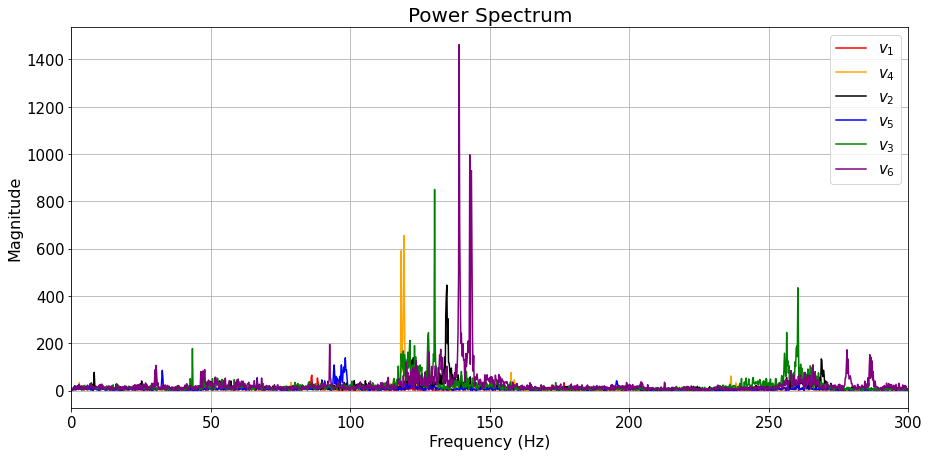

In [62]:
plt.figure(figsize=(15,7))
plot_spectrum(a_up_frequency,a_up_magnitude,4,'r','$v_1$')
plot_spectrum(a_up_frequency,a_up_magnitude,10,'orange','$v_4$')
plot_spectrum(a_up_frequency,a_up_magnitude,15,'black','$v_2$')
plot_spectrum(a_up_frequency,a_up_magnitude,20,'b','$v_5$')
plot_spectrum(a_up_frequency,a_up_magnitude,25,'g','$v_3$')
plot_spectrum(a_up_frequency,a_up_magnitude,30,'purple','$v_6$')
#graph features
#plt.ylim(0,2250)
plt.xlim(0,300)
plt.legend(fontsize=15)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel('Magnitude',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Power Spectrum', fontsize=20)
plt.grid()
plt.show()

### a_down

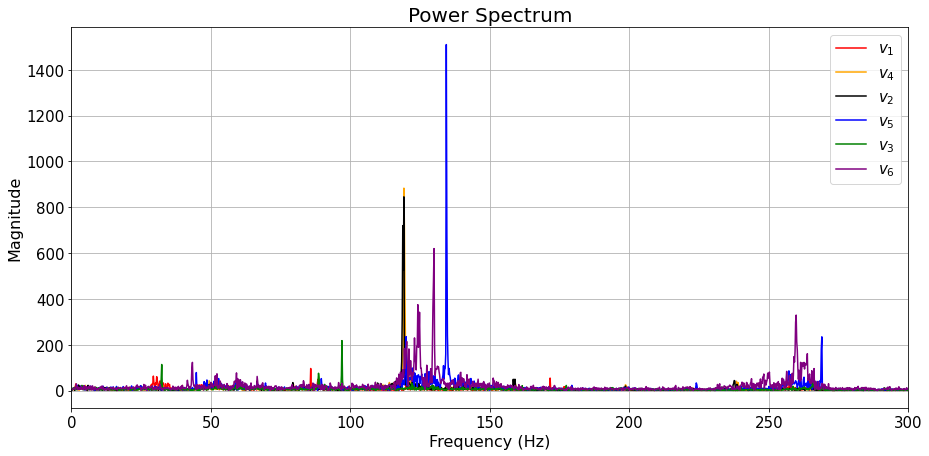

In [67]:
plt.figure(figsize=(15,7))
plot_spectrum(a_down_frequency,a_down_magnitude,0,'r','$v_1$')
plot_spectrum(a_down_frequency,a_down_magnitude,6,'orange','$v_4$')
plot_spectrum(a_down_frequency,a_down_magnitude,11,'black','$v_2$')
plot_spectrum(a_down_frequency,a_down_magnitude,16,'b','$v_5$')
plot_spectrum(a_down_frequency,a_down_magnitude,21,'g','$v_3$')
plot_spectrum(a_down_frequency,a_down_magnitude,26,'purple','$v_6$')
#graph features
#plt.ylim(0,2250)
plt.xlim(0,300)
plt.legend(fontsize=15)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel('Magnitude',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Power Spectrum', fontsize=20)
plt.grid()
plt.show()

## b_down

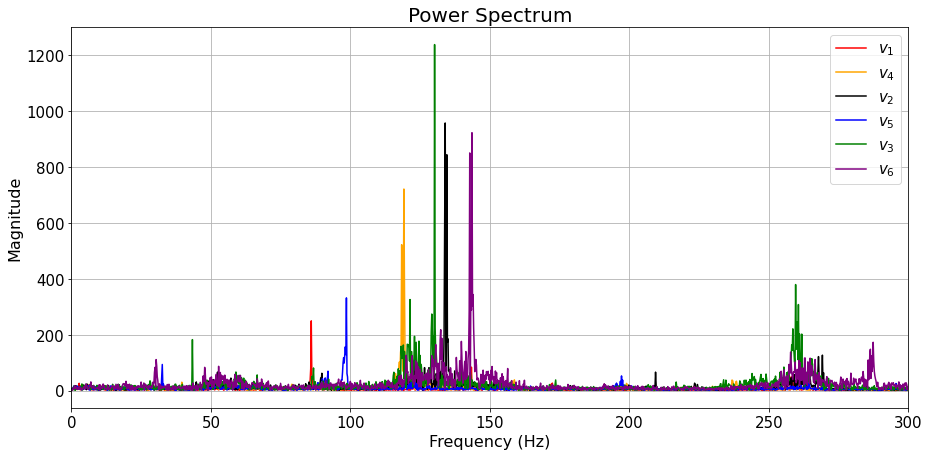

In [72]:
plt.figure(figsize=(15,7))
plot_spectrum(b_down_frequency,b_down_magnitude,4,'r','$v_1$')
plot_spectrum(b_down_frequency,b_down_magnitude,10,'orange','$v_4$')
plot_spectrum(b_down_frequency,b_down_magnitude,15,'black','$v_2$')
plot_spectrum(b_down_frequency,b_down_magnitude,20,'b','$v_5$')
plot_spectrum(b_down_frequency,b_down_magnitude,25,'g','$v_3$')
plot_spectrum(b_down_frequency,b_down_magnitude,30,'purple','$v_6$')
#graph features
#plt.ylim(0,2250)
plt.xlim(0,300)
plt.legend(fontsize=15)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel('Magnitude',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Power Spectrum', fontsize=20)
plt.grid()
plt.show()

## Encontrar peaks

In [34]:
intento1 = [b_up_frequency[9][:5000],b_up_magnitude[9][:5000]]
intento2 = [b_up_frequency[10][:5000],b_up_magnitude[10][:5000]]
intento3 = [b_up_frequency[11][:5000],b_up_magnitude[11][:5000]]

In [35]:
intento4 = [b_up_frequency[14][:5000],b_up_magnitude[14][:5000]]
intento5 = [b_up_frequency[15][:5000],b_up_magnitude[15][:5000]]
intento6 = [b_up_frequency[16][:5000],b_up_magnitude[16][:5000]]

In [466]:
intento7 = [b_up_frequency[24][:5000],b_up_magnitude[24][:5000]]
intento8 = [b_up_frequency[25][:5000],b_up_magnitude[25][:5000]]
intento9 = [b_up_frequency[26][:5000],b_up_magnitude[26][:5000]]

In [467]:
intento10 = [b_up_frequency[32][:5000],b_up_magnitude[32][:5000]]
intento11 = [b_up_frequency[30][:5000],b_up_magnitude[30][:5000]]
intento12 = [b_up_frequency[31][:5000],b_up_magnitude[31][:5000]]

In [515]:
intento13 = [b_up_frequency[3][:5000],b_up_magnitude[3][:5000]]
intento14 = [b_up_frequency[4][:5000],b_up_magnitude[4][:5000]]
intento15 = [b_up_frequency[5][:5000],b_up_magnitude[5][:5000]]

In [516]:
intento16 = [b_up_frequency[19][:5000],b_up_magnitude[19][:5000]]
intento17 = [b_up_frequency[20][:5000],b_up_magnitude[20][:5000]]
intento18 = [b_up_frequency[21][:5000],b_up_magnitude[21][:5000]]

In [462]:
intento1 = pd.DataFrame(intento1).transpose()
intento2 = pd.DataFrame(intento2).transpose()
intento3 = pd.DataFrame(intento3).transpose()

In [468]:
intento4 = pd.DataFrame(intento4).transpose()
intento5 = pd.DataFrame(intento5).transpose()
intento6 = pd.DataFrame(intento6).transpose()

In [469]:
intento7 = pd.DataFrame(intento7).transpose()
intento8 = pd.DataFrame(intento8).transpose()
intento9 = pd.DataFrame(intento9).transpose()

In [470]:
intento10 = pd.DataFrame(intento10).transpose()
intento11 = pd.DataFrame(intento11).transpose()
intento12 = pd.DataFrame(intento12).transpose()

In [517]:
intento13 = pd.DataFrame(intento13).transpose()
intento14 = pd.DataFrame(intento14).transpose()
intento15 = pd.DataFrame(intento15).transpose()

In [518]:
intento16 = pd.DataFrame(intento16).transpose()
intento17 = pd.DataFrame(intento17).transpose()
intento18 = pd.DataFrame(intento18).transpose()

In [463]:
intento1.columns = ['freq','magnitude']
intento2.columns = ['freq','magnitude']
intento3.columns = ['freq','magnitude']

In [471]:
intento4.columns = ['freq','magnitude']
intento5.columns = ['freq','magnitude']
intento6.columns = ['freq','magnitude']

In [472]:
intento7.columns = ['freq','magnitude']
intento8.columns = ['freq','magnitude']
intento9.columns = ['freq','magnitude']

In [473]:
intento10.columns = ['freq','magnitude']
intento11.columns = ['freq','magnitude']
intento12.columns = ['freq','magnitude']

In [519]:
intento13.columns = ['freq','magnitude']
intento14.columns = ['freq','magnitude']
intento15.columns = ['freq','magnitude']

In [520]:
intento16.columns = ['freq','magnitude']
intento17.columns = ['freq','magnitude']
intento18.columns = ['freq','magnitude']

In [464]:
intento1.to_excel('help1.xlsx')
intento2.to_excel('help2.xlsx')
intento3.to_excel('help3.xlsx')

<ipython-input-464-08ff80dec630>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento1.to_excel('help1.xlsx')
<ipython-input-464-08ff80dec630>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento2.to_excel('help2.xlsx')
<ipython-input-464-08ff80dec630>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento3.to_excel('help3.xlsx')


In [474]:
intento4.to_excel('help4.xlsx')
intento5.to_excel('help5.xlsx')
intento6.to_excel('help6.xlsx')

<ipython-input-474-81ae6a5e8ba2>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento4.to_excel('help4.xlsx')
<ipython-input-474-81ae6a5e8ba2>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento5.to_excel('help5.xlsx')
<ipython-input-474-81ae6a5e8ba2>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento6.to_excel('help6.xlsx')


In [475]:
intento7.to_excel('help7.xlsx')
intento8.to_excel('help8.xlsx')
intento9.to_excel('help9.xlsx')

<ipython-input-475-669d33ea457d>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento7.to_excel('help7.xlsx')
<ipython-input-475-669d33ea457d>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento8.to_excel('help8.xlsx')
<ipython-input-475-669d33ea457d>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento9.to_excel('help9.xlsx')


In [476]:
intento10.to_excel('help10.xlsx')
intento11.to_excel('help11.xlsx')
intento12.to_excel('help12.xlsx')

<ipython-input-476-3630bf0fca81>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento10.to_excel('help10.xlsx')
<ipython-input-476-3630bf0fca81>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento11.to_excel('help11.xlsx')
<ipython-input-476-3630bf0fca81>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento12.to_excel('help12.xlsx')


In [521]:
intento13.to_excel('help13.xlsx')
intento14.to_excel('help14.xlsx')
intento15.to_excel('help15.xlsx')

<ipython-input-521-5f5fa9995c6e>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento13.to_excel('help13.xlsx')
<ipython-input-521-5f5fa9995c6e>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento14.to_excel('help14.xlsx')
<ipython-input-521-5f5fa9995c6e>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento15.to_excel('help15.xlsx')


In [522]:
intento16.to_excel('help16.xlsx')
intento17.to_excel('help17.xlsx')
intento18.to_excel('help18.xlsx')

<ipython-input-522-90116c7c36ed>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento16.to_excel('help16.xlsx')
<ipython-input-522-90116c7c36ed>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento17.to_excel('help17.xlsx')
<ipython-input-522-90116c7c36ed>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  intento18.to_excel('help18.xlsx')


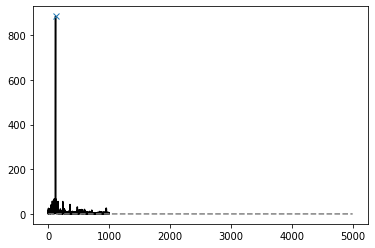

In [446]:
plt.plot(b_up_frequency[+6][:5000], b_up_magnitude[a+6][:5000], color='black', label='$v_2 = 1.9 m/s$')
plt.plot(119, 884.6416626, "x")
plt.plot(np.zeros_like(x1), "--", color="gray")
plt.show()

## Revisión linearidad

In [523]:
import pandas as pd

In [524]:
data = pd.read_excel('anemometro.xlsx')

In [525]:
data.columns = ['sample1','sample2','sample3','velocidad']

In [526]:
data

sample1   sample2   sample3  velocidad
0   86.2007   86.2007   86.0007        1.2
1   98.4008   96.4008   97.0008        1.4
2  119.0000  119.2010  119.2010        1.9
3  129.6010  130.2010  130.0000        2.0
4  134.8010  134.6010  133.8010        2.1
5  143.2010  143.2010  144.0000        2.2

In [527]:
data['mean'] = (data['sample1']+data['sample2']+data['sample3'])/3

In [530]:
data['std'] = [0.115470054,0.503322296,
0.116047404,
0.305396464,
0.529150262,
0.461302865
]

In [531]:
data

sample1   sample2   sample3  velocidad        mean       std
0   86.2007   86.2007   86.0007        1.2   86.134033  0.115470
1   98.4008   96.4008   97.0008        1.4   97.267467  0.503322
2  119.0000  119.2010  119.2010        1.9  119.134000  0.116047
3  129.6010  130.2010  130.0000        2.0  129.934000  0.305396
4  134.8010  134.6010  133.8010        2.1  134.401000  0.529150
5  143.2010  143.2010  144.0000        2.2  143.467333  0.461303

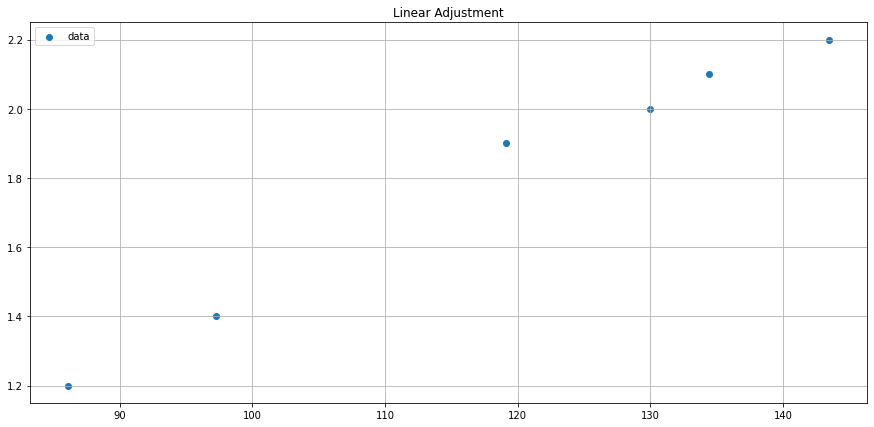

In [532]:
plt.figure(figsize=(15,7))
plt.scatter(data['mean'],data['velocidad'],label='data')
plt.grid()
plt.title('Linear Adjustment')
plt.legend()

In [533]:
from scipy.optimize import curve_fit

In [534]:
def func1(x, a, b):
    return a*x+b

In [535]:
popt1, pcov1 = curve_fit(func1, data["mean"], data["velocidad"])
# Use: bounds=(0, [3., 1., 0.5])
#np.sqrt(np.diag(pcov1))
popt1

array([ 0.0179674 , -0.32715362])

In [536]:
pcov1

array([[ 1.10822600e-06, -1.31202479e-04],
       [-1.31202479e-04,  1.59958191e-02]])

In [537]:
data

sample1   sample2   sample3  velocidad        mean       std
0   86.2007   86.2007   86.0007        1.2   86.134033  0.115470
1   98.4008   96.4008   97.0008        1.4   97.267467  0.503322
2  119.0000  119.2010  119.2010        1.9  119.134000  0.116047
3  129.6010  130.2010  130.0000        2.0  129.934000  0.305396
4  134.8010  134.6010  133.8010        2.1  134.401000  0.529150
5  143.2010  143.2010  144.0000        2.2  143.467333  0.461303

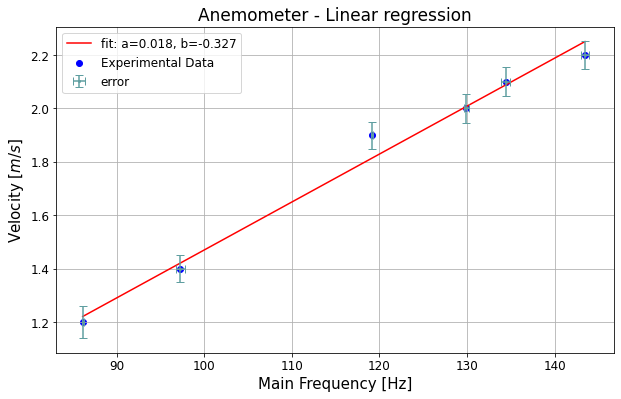

In [547]:
plt.figure(figsize=(10,6))
plt.plot(data["mean"], func1(data["mean"], *popt1), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt1))
plt.scatter(data["mean"],data["velocidad"],label="Experimental Data",color='blue')
plt.errorbar(data['mean'], data['velocidad'],
             xerr = data['std'],
             yerr = [0.06,0.052,0.051,0.054,0.054,0.051],
             fmt ='o',color='cadetBlue', markersize=2, capsize=4, label='error')
plt.legend(loc=2,fontsize=12)
plt.xlabel('Main Frequency [Hz]',fontsize=15)
plt.ylabel('Velocity $[m/s]$',fontsize=15)
plt.title('Anemometer - Linear regression',fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

In [260]:
E=np.sqrt(np.mean((df_final['velocity']-func1(df_final['freq'], *popt1))**2))
print("Error on fit is ={}".format(E))

Error on fit is =0.01612369277781874
